# Dataset for equality constraint

## create a function

0.027287013480224075 4.050000000000001


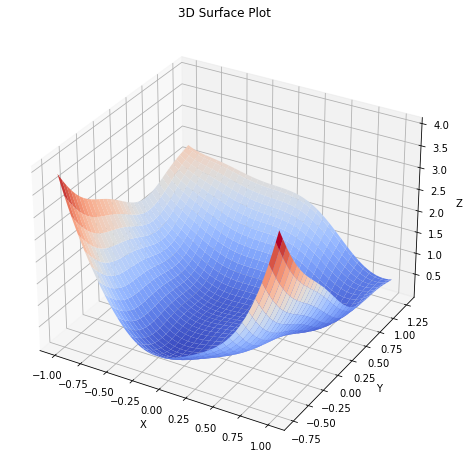

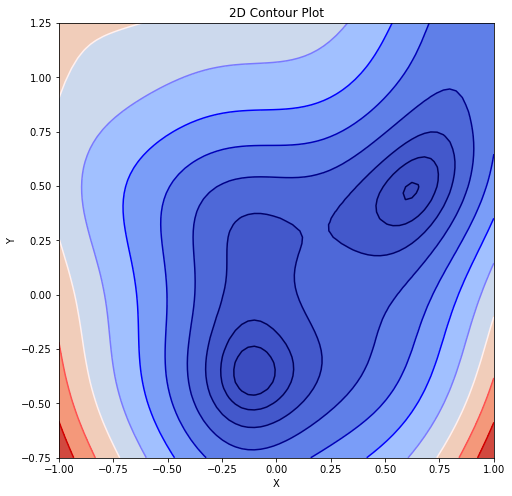

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def rosenbrock(x, y):
    a = 0.25
    b = 1
    return (a - x)**2 + b*(y - x**2)**2 + 0.1*np.sin(2*np.pi*x) + 0.1*np.cos(2*np.pi*y) + 0.2*x + 0.2*y - 0.5*x*y


def softplus(x):
    return np.log(1 + np.exp(x))


def desoftplus(x):
    return np.log(np.exp(x) - 1)


x = np.linspace(-1, 1, 70)
y = np.linspace(-0.75, 1.25, 70)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

z_min, z_max = np.abs(Z).min(), np.abs(Z).max()
print(z_min, z_max)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax1.set_title('3D Surface Plot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111)
levels = softplus(np.linspace(desoftplus(z_min), desoftplus(z_max), 12))
contour = ax2.contourf(X, Y, Z, levels=levels, cmap='coolwarm')
contour = ax2.contour(X, Y, Z, levels=levels, cmap='seismic')
ax2.set_title('2D Contour Plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_aspect('equal')

plt.show()

## convert to dataset

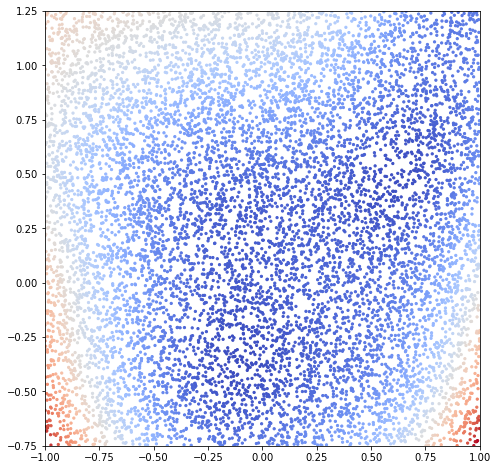

In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# generate data
N = 10000
X_data = torch.rand(N,2)
X_data[:,0] = X_data[:,0] * 2 - 1
X_data[:,1] = X_data[:,1] * 2 - 0.75
Y_data = rosenbrock(X_data[:,0], X_data[:,1]).unsqueeze(1)

# Visualize data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_data[:, 0].numpy(), X_data[:, 1].numpy(), c=Y_data.numpy(), s=5, cmap='coolwarm')
ax.set_xlim(-1, 1)
ax.set_ylim(-0.75, 1.25)
ax.set_aspect('equal')

# normalize data
X_min = torch.tensor([-1.0, -0.75])
X_max = torch.tensor([1.0, 1.25])
Y_min = torch.tensor([0.0])
Y_max = torch.tensor([4.0])
Xn_data = (X_data - X_min) / (X_max - X_min)
Yn_data = (Y_data - Y_min) / (Y_max - Y_min)

# split data
N_train = int(N * 0.7)
N_valid = int(N * 0.2)
N_test = N - N_train - N_valid
X_train = Xn_data[:N_train]
Y_train = Yn_data[:N_train]
X_valid = Xn_data[N_train:N_train+N_valid]
Y_valid = Yn_data[N_train:N_train+N_valid]
X_test = Xn_data[N_train+N_valid:]
Y_test = Yn_data[N_train+N_valid:]

# Dataset
train_dataset = TensorDataset(X_train, Y_train)
valid_dataset = TensorDataset(X_valid, Y_valid)
test_dataset = TensorDataset(X_test, Y_test)
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=256)
valid_loader = DataLoader(valid_dataset, batch_size=N_valid)
test_loader = DataLoader(test_dataset, batch_size=N_test)

# save data
loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
torch.save(loaders, './constraint_data.loader')